Description:
The Pima Indians Diabetes Database is a well-known dataset used for predicting the onset of diabetes in a population of Pima Native American women. The dataset was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases. It contains various health-related attributes for individuals, along with an outcome variable indicating whether the individual developed diabetes within five years of the data collection (1) or did not (0).

Attributes:
Pregnancies: Number of times pregnant.
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
BloodPressure: Diastolic blood pressure (mm Hg).
SkinThickness: Triceps skin fold thickness (mm).
Insulin: 2-Hour serum insulin (mu U/ml).
BMI: Body mass index (weight in kg/(height in m)^2).
DiabetesPedigreeFunction: Diabetes pedigree function (a function that scores likelihood of diabetes based on family history).
Age: Age in years.
Outcome: Class variable (0 or 1) indicating whether the person has diabetes or not.
Example Data Point:
For the data point you provided:


6	148	72	35	0	33.6	0.627	50	1




Pregnancies: 6
Glucose: 148
BloodPressure: 72
SkinThickness: 35
Insulin: 0
BMI: 33.6
DiabetesPedigreeFunction: 0.627
Age: 50
Outcome: 1 (indicating the person has diabetes)
Interpretation:
This specific data point represents a woman who:

Has been pregnant 6 times.
Has a plasma glucose concentration of 148 mg/dL after a 2-hour oral glucose tolerance test.
Has a diastolic blood pressure of 72 mm Hg.
Has a triceps skin fold thickness of 35 mm.
Has a 2-hour serum insulin level of 0 mu U/ml (which could be a missing or zero value, depending on the context).
Has a body mass index (BMI) of 33.6 kg/m^2.
Has a diabetes pedigree function score of 0.627, indicating a moderate likelihood of diabetes based on family history.
Is 50 years old.
Has been diagnosed with diabetes (Outcome = 1).
Usage:
Machine Learning: This dataset is commonly used to build predictive models that can predict the likelihood of diabetes based on these health attributes.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score #for selecting better kernal
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE # for recusivly selecting the best features for prediction
import seaborn as sns # for correlation analysis
import matplotlib.pyplot as plt # for corelation analysis
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'D:\Surya files\DataScience\ML\Classification\SVM\DiabetiesDetection\input\diabetes.csv')

In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
print('Total columns',len(df.columns))

Total columns 9


In [5]:
df.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# updating last outcolumn called outcome 767 row for nullvalues
df.iloc[767,df.columns.get_loc('Outcome')]=''

In [7]:
df.iloc[767]

Pregnancies                     1
Glucose                        93
BloodPressure                  70
SkinThickness                  31
Insulin                         0
BMI                          30.4
DiabetesPedigreeFunction    0.315
Age                            23
Outcome                          
Name: 767, dtype: object

In [8]:
df.replace('',np.nan,inplace=True)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [11]:
df.iloc[767]

Pregnancies                  1.000
Glucose                     93.000
BloodPressure               70.000
SkinThickness               31.000
Insulin                      0.000
BMI                         30.400
DiabetesPedigreeFunction     0.315
Age                         23.000
Outcome                        NaN
Name: 767, dtype: float64

In [12]:
#suspecting if multiple values are there apart from 0 and 1 checking nana values manually 
print(df['Outcome'].unique())


[ 1.  0. nan]


## checking if any empty values are there or not

In [13]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     1
dtype: int64

In [14]:
df.iloc[767]

Pregnancies                  1.000
Glucose                     93.000
BloodPressure               70.000
SkinThickness               31.000
Insulin                      0.000
BMI                         30.400
DiabetesPedigreeFunction     0.315
Age                         23.000
Outcome                        NaN
Name: 767, dtype: float64

## dropping null values

In [15]:
df.dropna(inplace=True)

In [16]:
df.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0.0
766,1,126,60,0,0,30.1,0.349,47,1.0


In [17]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column {col} has null values:")
        print(df[df[col].isnull()])

In [18]:
df['Outcome'].value_counts()

0.0    499
1.0    268
Name: Outcome, dtype: int64

## corelation analysis for feature selection
features can be selected by
Filter Method: Use the correlation values to filter out features.
Wrapper Method: Use Recursive Feature Elimination (RFE) to select the best subset of features.
Embedded Method: Use algorithms that have built-in feature selection like Lasso, Ridge, or tree-based methods.

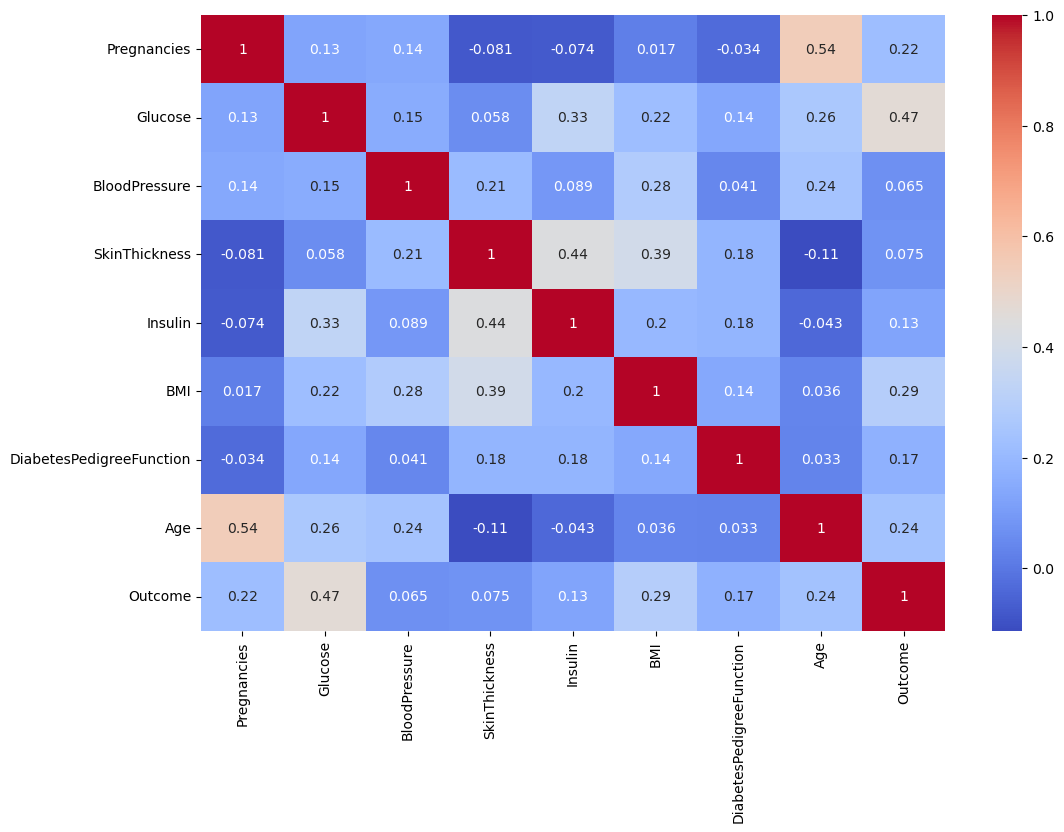

In [19]:
corr=df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [20]:

#pinting the corelation with the target variable

print(corr['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466143
BMI                         0.292612
Age                         0.237725
Pregnancies                 0.221272
DiabetesPedigreeFunction    0.173478
Insulin                     0.129973
SkinThickness               0.075426
BloodPressure               0.065135
Name: Outcome, dtype: float64


In [21]:
selcted_features=['Glucose','BMI','Age','Pregnancies']
X=df[selcted_features]
y=df['Outcome']

Choosing between a linear and non-linear kernel for Support Vector Machines (SVMs) depends largely on the nature of your data and the problem you are trying to solve. Here’s a guideline on how to decide which kernel to use:

Linear Kernel
When to Use:

Use a linear kernel (kernel='linear') when your data is linearly separable, meaning the classes can be effectively separated by a straight line (or hyperplane in higher dimensions).
Linear kernels are computationally efficient and often work well when the number of features (dimensions) is large relative to the number of samples.
Advantages:

Computationally efficient, especially with large datasets.
Works well when the relationship between features and the target variable is linear.
Example:

If your dataset has features where classes are well-separated by a straight line (or hyperplane), such as in some basic classification problems with clear decision boundaries.
Non-Linear Kernels
When to Use:

Use non-linear kernels like Gaussian Radial Basis Function (kernel='rbf') or polynomial (kernel='poly') when the relationship between features and the target variable is non-linear.
Non-linear kernels allow SVMs to model complex decision boundaries that cannot be captured by linear methods.
Advantages:

Flexibility to capture complex relationships in the data.
Can handle data that is not linearly separable.
Example:

If your dataset has features where classes are not easily separable by a straight line or if you suspect a non-linear relationship between features and the target variable.
How to Decide
Visual Inspection: Plot your data points and inspect if they can be separated by a linear boundary. If yes, a linear kernel might suffice.

Cross-Validation: Use cross-validation to evaluate different kernels (linear vs. non-linear) and choose the one that gives the best performance metrics (e.g., accuracy, F1-score) on unseen data.

Domain Knowledge: Consider your understanding of the problem domain. If you know or suspect a non-linear relationship between features and the outcome, a non-linear kernel might be more appropriate.

the code snippet scaler = StandardScaler() followed by X_scaled = scaler.fit_transform(X) performs feature scaling using the StandardScaler from the scikit-learn library. Here's what each part of the code does:

StandardScaler Explanation
Standardization: StandardScaler standardizes features by removing the mean and scaling to unit variance. It transforms the data such that it has a mean of 0 and a standard deviation of 1.

Usage: This preprocessing step is crucial, especially for machine learning algorithms that are sensitive to the scale of numeric features. SVMs, in particular, perform better when features are standardized because they calculate distances between data points.

Breakdown of the Code:
Initialization: scaler = StandardScaler() creates an instance of the StandardScaler object.

Fit and Transform: X_scaled = scaler.fit_transform(X) performs two operations:

Fit: The fit method calculates the mean and standard deviation for each feature in the training set X.
Transform: The transform method then applies these calculated statistics to standardize the data by subtracting the mean and dividing by the standard deviation for each feature.
Why Standardization is Important:
Equalize the Scale: Standardization ensures that all features have the same scale, preventing features with larger numeric ranges from dominating the training process.

Improves Convergence: Algorithms like SVMs converge faster when features are on a similar scale. It can lead to improved performance and more stable models.

In [22]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [23]:
X

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0
...,...,...,...,...
762,89,22.5,33,9
763,101,32.9,63,10
764,122,36.8,27,2
765,121,26.2,30,5


In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Linear kernal

In [25]:
# SVM with linear kernel
svm_linear = SVC(kernel='linear')
scores_linear = cross_val_score(svm_linear, X_train, y_train, cv=5, scoring='accuracy')

## Non-linear kernal rbf kernal

In [26]:
svm_rbf=SVC(kernel='rbf')
scores_rbf=cross_val_score(svm_rbf,X_train,y_train,cv=5,scoring='accuracy')

## comparing the scoress

In [27]:
print("Mean accurecy (inear kernal)",scores_linear.mean())
print("Mean accurecy(rbf kernal)",scores_rbf.mean())
if scores_linear.mean() > scores_rbf.mean():
    print("Linear kernel performs better.")
    best_model = svm_linear
else:
    print("RBF kernel performs better.")
    best_model = svm_rbf


Mean accurecy (inear kernal) 0.7651206184192989
Mean accurecy(rbf kernal) 0.756937225109956
Linear kernel performs better.


## As linear model is is working fine taken linear as kernal

In [28]:
#training the best model
best_model.fit(X_train,y_train)


SVC(kernel='linear')

In [29]:
predictions=best_model.predict(X_test)
accurecy=accuracy_score(y_test,predictions)

In [30]:
print(f'Accurecy: {accurecy * 100:.2f}%')
print("Confusion matrix: \n",confusion_matrix(y_test,predictions))
print("\nClassification report:\n",classification_report(y_test,predictions))

Accurecy: 77.92%
Confusion matrix: 
 [[90 13]
 [21 30]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       103
         1.0       0.70      0.59      0.64        51

    accuracy                           0.78       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



### Hyperparammeter tuning
As i am ggetting less accurecy i am performing Hyperparameter tuning for SVM model
2. Model Tuning:
Hyperparameter Tuning: Experiment with different hyperparameters for your SVM model using techniques like Grid Search or Random Search to find the best combination for your dataset.

In [31]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## using grid search

In [32]:
param_grid={
    'C':[0.1,10,100],
    'gamma':['scale','auto']+[0.001,0.01,0.1,1],
    'kernel':['linear','rbf','poly']
}

## using Random search

In [33]:
param_distributions={
    'C':np.logspace(-3,3,7),
    'gamma':['scale','auto']+list(np.logspace(-3,1,5)),
    'kernel':['linear','rbf','poly']
}

## Model tuniing with grid search

In [34]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters (Grid Search):", grid_search.best_params_)

Best Parameters (Grid Search): {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## Model tuning with random search

In [38]:
# random_search=RandomizedSearchCV(SVC(),param_distributions,n_iter=100,cv=5,scoring='f1', n_jobs=-1, random_state=42)
# random_search.fit(X_train,y_train)
# best_model=random_search.best_estimator_
# print("Best paramaeters(Random search):",random_search.best_parameters)

Since above code is taking so much time i have decreased iterations and folds to less

Strategies to Reduce Computation Time
Reduce the Number of Iterations:

Lower the number of iterations in RandomizedSearchCV.
Simplify the Parameter Grid:

Limit the range and number of hyperparameters you are tuning.
Reduce Cross-Validation Folds:

Use fewer folds for cross-validation (e.g., cv=3 instead of cv=5).
Use a Subset of the Data:

Use a smaller subset of your data for hyperparameter tuning, and then validate on the full dataset.
Parallel Processing:

Ensure n_jobs=-1 to utilize all available CPU cores.
Early Stopping:

Use a smaller number of n_iter for initial runs and increase iteratively based on performance improvements.

In [36]:
param_distributions = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=30, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters (Random Search):", random_search.best_params_)


Best Parameters (Random Search): {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


c:\Users\surya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Upon oberving the above parameters i am trying to fit the model with the given parameters

In [44]:
# Train and evaluate with Grid Search parameters
model_grid_search = SVC(kernel='rbf', gamma=0.1, C=10)
model_grid_search.fit(X_train, y_train)
y_pred_grid_search = model_grid_search.predict(X_test)
print(f'Accurecy: {accurecy * 100:.2f}%')
print("Confusion matrix: \n",confusion_matrix(y_test,y_pred_grid_search))
print("Classification Report (Grid Search):")
print(classification_report(y_test, y_pred_grid_search))


Accurecy: 77.92%
Confusion matrix: 
 [[82 21]
 [19 32]]
Classification Report (Grid Search):
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       103
         1.0       0.60      0.63      0.62        51

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [45]:
# Train and evaluate with Random Search parameters
model_random_search = SVC(kernel='linear', gamma='scale', C=0.1)
model_random_search.fit(X_train, y_train)
y_pred_random_search = model_random_search.predict(X_test)
print(f'Accurecy: {accurecy * 100:.2f}%')
print("Confusion matrix: \n",confusion_matrix(y_test,y_pred_random_search))
print("Classification Report (Random Search):")
print(classification_report(y_test, y_pred_random_search))

Accurecy: 77.92%
Confusion matrix: 
 [[90 13]
 [21 30]]
Classification Report (Random Search):
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       103
         1.0       0.70      0.59      0.64        51

    accuracy                           0.78       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



Evaluatin the model

In [39]:
y_pred = best_model.predict(X_test)


In [40]:
print(f'Accurecy: {accurecy * 100:.2f}%')
print("Confusion matrix: \n",confusion_matrix(y_test,predictions))
print("\nClassification report:\n",classification_report(y_test,predictions))

Accurecy: 77.92%
Confusion matrix: 
 [[90 13]
 [21 30]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       103
         1.0       0.70      0.59      0.64        51

    accuracy                           0.78       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

